*Thinkful Data Science Prep Course Capstone*

*Jason Paik - jasonpaik9@gmail.com*


# World Happiness Report - Can a country's happiness actually be understood?


## Introduction

Earlier this past January of 2018, Professor Laurie Santos led a spring semester class entitled *Psychology and the Good Life* for Yale University students, marking the course as the school's most popularly attended class of all-time enrolling close to 25% of the student population. Dr. Santos' class aimed to feature lectures on what things would or would not make people happy, along with contributors that might bring life-lasting satisfaction. From national media coverage by the New York Times to trending winds on social media, I begged the curious question - why all of a sudden are we crazed to find what happiness is? Is there an actual methodology to this "happiness"? And if so, what is it and does a happiness-driven life correlate to one's "success"?

In curioustly, I delved into **The World Happiness Report**, a United Nations programme started fairly recently in 2012, aiming to answer this very same question but on a global-level. The UN ultimately has the interest to gather these insights into the foresight of bringing countries self-awareness of their own people's thoughts and future outlooks, an indication of what a country can boast or improve upon. To do so, economists developed an in-depth survey with questions asking respective citizens what led them to the "happiness score" they had and the survey concluded their score into the sum of six distinct categories -- Economy (GDP), Family, Health and Life Expectancy, Freedom, Trust in the Government, and Generosity. 

Using Thinkful's Data Science prep course concepts, I analyzed my findings using various descriptive statistics and data visualizations.

## Dataset Overview

The dataset I analyzed ranged between the years of 2015-2017. Within the dataset, the Happiness Score is calculated by the sum of the six categorical variables the survey ascertained, along with a variable called "Dystopian_Residual". I did not focus all too much on this variable as it is defined by the World Happiness Report (WHR) simply as a "benchmark"; the benchmark essentially represents the country "Dystopia" (as opposed to "Utopia") where happiness is virtually at the world's lowest, so it only serves itself as a baseline standard and holds no statistical value to one's survey or score. Thus, I created a column called "HappinessScore_woDystopia" as a baseline to see a country's Happiness Score without that "Dystopian_Residual" influence. However, for the sake of my dataset and the visualizations below, I chose to instead use the data's given "Happiness Score" as my tracker for Happiness Score because the scores will be more easily interpreted since its initial interpretation was based between 1-10 (10 being perfectly happy). 

While these six variables are intrinsically self-explanatory, it is important to realize that the denominator behind these variables is to frame your perception based on the citizen's outlook of that category. For example, the surveyor is not just interpreting their sense of "Economy_GDP" as the country's statistic but more along the lines of their perception of their country's economy, both on a local and national level and how that might dampen or improve. Naturally, the aim of analysis is to capture the relationship of these variables and not only how it contributes towards a particular Happiness Score but also the correlation between these variables themselves. Naturally, as another example, one's outlook on their own "Freedom" might be affected their "Trust in the Government" but it might not necessarily affect their own altruism in their "Generosity" score. 

Let's take a look into the data by calculating some descriptive statistics as a general start.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [5]:
data = pd.read_csv('/Users/jasonpaik9/Documents/Thinkful/Unit 4/HappinessData_2015-17.csv')
data_yoy = pd.read_csv('/Users/jasonpaik9/Documents/Thinkful/Unit 4/happinessdata_yoy_country.csv')

In [6]:
data_2015 = data[data['Year'].isin(['2015'])]
data_2016 = data[data['Year'].isin(['2016'])]
data_2017 = data[data['Year'].isin(['2017'])]

In [71]:
median_array = np.array([[2015,data_2015['HappinessScore'].median(),data_2015['HappinessScore_woDystopia'].median(),
                             data_2015['Economy_GDP'].median(),data_2015['Family'].median(),
                             data_2015['Health_LifeExp'].median(),data_2015['Freedom'].median(),
                             data_2015['Trust_GovtCorruption'].median(),data_2015['Generosity'].median()],
                      [2016,data_2016['HappinessScore'].median(),data_2016['HappinessScore_woDystopia'].median(),
                             data_2016['Economy_GDP'].median(),data_2016['Family'].median(), 
                             data_2016['Health_LifeExp'].median(),data_2016['Freedom'].median(),
                             data_2016['Trust_GovtCorruption'].median(),data_2016['Generosity'].median()],
                      [2017,data_2017['HappinessScore'].median(),data_2017['HappinessScore_woDystopia'].median(),
                             data_2017['Economy_GDP'].median(),data_2017['Family'].median(),
                             data_2017['Health_LifeExp'].median(),data_2017['Freedom'].median(),
                             data_2017['Trust_GovtCorruption'].median(),data_2017['Generosity'].median()]])
df_median_array = pd.DataFrame(median_array)
df_median_array.columns = ['Year','HappinessScoreMedian','HappinessScore_woDys_Median','EconomyGDPMedian',
                           'FamilyMedian','HealthLifeExpMedian','FreedomMedian','TrustGovtCorruptionMedian',
                           'GenerosityMedian']
avg_array = np.array([[2015,data_2015['HappinessScore'].mean(),data_2015['HappinessScore_woDystopia'].mean(),
                             data_2015['Economy_GDP'].mean(),data_2015['Family'].mean(),
                             data_2015['Health_LifeExp'].mean(),data_2015['Freedom'].mean(),
                             data_2015['Trust_GovtCorruption'].mean(),data_2015['Generosity'].mean()],
                      [2016,data_2016['HappinessScore'].mean(),data_2016['HappinessScore_woDystopia'].mean(),
                             data_2016['Economy_GDP'].mean(),data_2016['Family'].mean(), 
                             data_2016['Health_LifeExp'].mean(),data_2016['Freedom'].mean(),
                             data_2016['Trust_GovtCorruption'].mean(),data_2016['Generosity'].mean()],
                      [2017,data_2017['HappinessScore'].mean(),data_2017['HappinessScore_woDystopia'].mean(),
                             data_2017['Economy_GDP'].mean(),data_2017['Family'].mean(),
                             data_2017['Health_LifeExp'].mean(),data_2017['Freedom'].mean(),
                             data_2017['Trust_GovtCorruption'].mean(),data_2017['Generosity'].mean()]])
df_avg_array = pd.DataFrame(avg_array)
df_avg_array.columns = ['Year','HappinessScoreAvg','HappinessScore_woDys_Avg','EconomyGDPAvg','FamilyAvg','HealthLifeExpAvg','FreedomAvg','TrustGovtCorruptionAvg',
                           'GenerosityAvg']
var = np.array([['Happiness_stDev',np.std(data_yoy['HappinessScore2015']),np.std(data_yoy['HappinessScore2016']),
                    np.std(data_yoy['HappinessScore2017'])],
                ['Economy_stDev',np.std(data_yoy['EconomyAvg_2015']),np.std(data_yoy['EconomyAvg_2016']),
                    np.std(data_yoy['EconomyAvg_2017'])],
                ['Family_stDev',np.std(data_yoy['FamilyAvg_2015']),np.std(data_yoy['FamilyAvg_2016']),
                    np.std(data_yoy['FamilyAvg_2017'])],
                ['HealthLifeExp_stDev',np.std(data_yoy['HealthLifeExpAvg_2015']),np.std(data_yoy['HealthLifeExpAvg_2016']),
                    np.std(data_yoy['HealthLifeExpAvg_2017'])],
                ['Freedom_stDev',np.std(data_yoy['FreedomAvg_2015']),np.std(data_yoy['FreedomAvg_2016']),
                    np.std(data_yoy['FreedomAvg_2017'])],
                ['TrustGovt_stDev',np.std(data_yoy['TrustGovtAvg_2015']),np.std(data_yoy['TrustGovtAvg_2016']),
                    np.std(data_yoy['TrustGovtAvg_2017'])],
                ['Generosity_stDev',np.std(data_yoy['GenerosityAvg_2015']),np.std(data_yoy['GenerosityAvg_2016']),
                    np.std(data_yoy['GenerosityAvg_2017'])]])
variance_array = pd.DataFrame(var)
variance_array.columns = ['Variable','2015','2016','2017']
pd.options.display.float_format = None

In [43]:
df_avg_array

,Year,HappinessScoreAvg,HappinessScore_woDys_Avg,EconomyGDPAvg,FamilyAvg,HealthLifeExpAvg,FreedomAvg,TrustGovtCorruptionAvg,GenerosityAvg
0,2015.0,5.375734,3.276775,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
1,2016.0,5.382185,3.056372,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635
2,2017.0,5.354019,3.503746,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120


In [44]:
df_median_array

,Year,HappinessScoreMedian,HappinessScore_woDys_Median,EconomyGDPMedian,FamilyMedian,HealthLifeExpMedian,FreedomMedian,TrustGovtCorruptionMedian,GenerosityMedian
0,2015.0,5.2325,3.268175,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
1,2016.0,5.3140,3.074380,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450
2,2017.0,5.2790,3.530173,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848


### *Average and Median Scores*

As a part of looking at descriptive statistics, when I calcuated the averages and medians of all Happiness Scores over the three years, the scores between all the countries relatively stayed the same. I realized, however, that this score might have been affected by the "Dystopian_Residual" variable and the nature of a constant benchmark value so I focused on the "Happiness_woDys_Average" to better classify the trend of happiness as a result of these six variables. We see the overall "Happiness_Score" plateau (which is also interesting in it of itself considering what will be mentioned next) but the "Happiness_woDys_Average" variable dips a bit in 2016.

To better visualize the other variables and how they changed, I created a line plot visual of the six variable's averages year-over-year and noticed some insights that might explain the dip in "Happiness_woDys_Average". We see a sharp a decline in the "Family" average in 2016 but then a sharp increase again into 2017. The outlook on the "Economy_GDP" improved slightly while "Health_LifeExpectancy" worsened slightly over the three years. The variables are wide-ranging but relatively stay around the same values which might explain the plateauing of the overall "Happiness_Score". Overall, this gives a general overview but a deeper dive into the behavior of these variables will be needed.

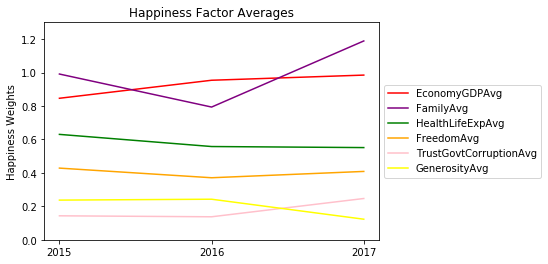

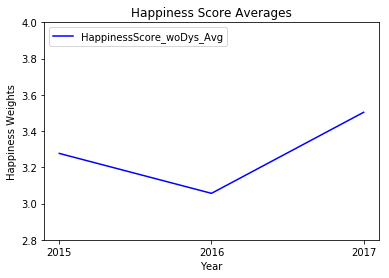

In [61]:
plt.subplots(1,sharex = True)
x = ['2015','2016','2017']
plt.plot(x,df_avg_array.EconomyGDPAvg,color='red')
plt.plot(x,df_avg_array.FamilyAvg,color='purple')
plt.plot(x,df_avg_array.HealthLifeExpAvg,color='green')
plt.plot(x,df_avg_array.FreedomAvg,color='orange')
plt.plot(x,df_avg_array.TrustGovtCorruptionAvg,color='pink')
plt.plot(x,df_avg_array.GenerosityAvg,color='yellow')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Happiness Factor Averages')
plt.ylim([0,1.3])
plt.ylabel('Happiness Weights')
plt.show()
plt.subplots(1,sharex = True)
x = ['2015','2016','2017']
plt.plot(x,df_avg_array.HappinessScore_woDys_Avg,color='blue')
plt.legend(loc = 'upper left')
plt.title('Happiness Score Averages')
plt.xlabel('Year')
plt.ylim([2.8,4.0])
plt.ylabel('Happiness Weights')
plt.show()

### *Standard Deviations*

To supplement some of the mean and median data, I set up a table overlooking the standard deviation of these variables. The standard deviation of these variables relatively tell us that overall, most of these six variables are not as varied and relatively stay within a reasonable range of each other. This gave me an initial confidence to the dataset that the data did not have too many outliers and that the values did seem in line to one another. In the context of these variable factors, the standard deviation of the Economy fluctuated the most which should make sense as the economy outlooks of every country is so different and subjective to the experience of the surveyor. 

However, what I could draw was that the standard deviations of the Happiness Scores were the most varied. This may be due to Happiness Scores being ranked 1-10 rather than actual variances themselves. But what is interesting is that the happiness standard deviations stay right around the 1.1 value year over year. Although Happiness Scores change year over year for each individual country, the flatline average of Happines Scores for the world overall stay the same which tells us that no matter how varied each category might be, overall happiness for the world did not seem to change much. The sample size of the dataset year over year is small but implications of a country changing to these survey scores seem minimal on an overall scale.

In [72]:
variance_array

,Variable,2015,2016,2017
0,Happiness_stDev,1.1451431583673526,1.1398316873800076,1.1129629677695978
1,Economy_stDev,0.3931416267009978,0.40493344969220146,0.4026082103865549
2,Family_stDev,0.2628934531435882,0.26211799216369885,0.2684735056540133
3,HealthLifeExp_stDev,0.23304792610246983,0.22564435843080344,0.22256522312736407
4,Freedom_stDev,0.1509107762868731,0.1442375477289538,0.1501975780635327
5,TrustGovt_stDev,0.12054629889869424,0.1119742421782597,0.13684044259012854
6,Generosity_stDev,0.12830554077409648,0.13473951657762964,0.10216788329917481


## Question 1 - What are the relationships between these six variables and which have the strongest correlation to a country's "Happiness Score"?

The first question I wanted to get at was to understand the correlation between Happiness Scores and each of the six variables - what were the top three "strongest" variables that contributed towards the trajectory of a citizen's Happiness Score? This essentially framed by overall analysis in trying to pinpoint what actually contributes to a citizen's happiness and whether there was a formulaic approach to this. Using the correlation function on Python to see what the top three were, I had statistically confidence in Economy_GDP, Family, and Health_LifeExpectancy in being the three strongest variables to an individual as shown here:

In [54]:
## Question 1 - what are the relationships between these variables to each other?
## Top 3 correlated variables: Economy GDP, Family, Life Expectancy
df_variable = pd.DataFrame(data)
corr = df_variable.drop(['Year','Country','Region','HappinessScore_woDystopia','Dystopia_Residual'],
                        axis=1).corr()
corr.style.background_gradient()

,HappinessScore,Economy_GDP,Family,Health_LifeExp,Freedom,Trust_GovtCorruption,Generosity
HappinessScore,1,0.78545,0.636532,0.74804,0.560353,0.28213,0.221684
Economy_GDP,0.78545,1,0.585449,0.792224,0.344962,0.200855,0.0394131
Family,0.636532,0.585449,1,0.486383,0.425377,0.289768,-0.0835276
Health_LifeExp,0.74804,0.792224,0.486383,1,0.359566,0.135961,0.161436
Freedom,0.560353,0.344962,0.425377,0.359566,1,0.405894,0.346951
Trust_GovtCorruption,0.28213,0.200855,0.289768,0.135961,0.405894,1,0.0843899
Generosity,0.221684,0.0394131,-0.0835276,0.161436,0.346951,0.0843899,1


### *Above-Average Happiness..?*

After understanding these top three variables, I wanted to go in-depth to run a test to see if there were countries, year by year, whether they achieved above-average Happiness Scores even if those three strong variables were below the yearly average. This most likely would give me an insight as to how these countries behaved in other categories that might have led to their relatively "successful" Happiness Score. I ran a simple descriptive statistic test to slice the data and then compared the differences between the other three variables (Freedom, Trust in the Government, and Generosity) to see which had the greatest pull towards a country's above-average happiness. The same data test is ran through for each year starting in 2017.

In [46]:
## Can you achieve an above-average Happiness Score despite having below-average scores for top 3
## correlated variables?
data.loc[(data.Year == 2017) & (data.Economy_GDP < data_2017['Economy_GDP'].mean())
            & (data.Family < data_2017['Family'].mean())
            & (data.Health_LifeExp < data_2017['Health_LifeExp'].mean())
            & (data.HappinessScore > data_2017['HappinessScore'].mean())]

,Year,Country,Region,HappinessScore,HappinessScore_woDystopia,Economy_GDP,Family,Health_LifeExp,Freedom,Trust_GovtCorruption,Generosity,Dystopia_Residual
406,2017,Belize,Latin America and Caribbean,5.956,3.323691,0.907975,1.081418,0.450192,0.547509,0.240016,0.096581,2.631956


In [48]:
## This shows me the importance of Freedom for an invididual's happiness - if you feel free personally as an
## then you might be more happy or optimistic about things in your life
print("Differences between Other Happiness Score Variables for 2017:")
print("HappinessScore = {}".format(5.956 - data_2017['HappinessScore'].mean()))
print("Freedom = {}".format(0.547509 - data_2017['Freedom'].mean()))
print("Trust_GovtCorruption = {}".format(0.240016 - data_2017['Trust_GovtCorruption'].mean()))
print("Generosity = {}".format(0.096581 - data_2017['Generosity'].mean()))

Differences between Other Happiness Score Variables for 2017:
HappinessScore = 0.6019806442258071
Freedom = 0.1387230271354838
Trust_GovtCorruption = -0.006867471619354831
Generosity = -0.026539220625806437


In [49]:
data.loc[(data.Year == 2016) & (data.Economy_GDP < data_2016['Economy_GDP'].mean())
            & (data.Family < data_2016['Family'].mean())
            & (data.Health_LifeExp < data_2016['Health_LifeExp'].mean())
            & (data.HappinessScore > data_2016['HappinessScore'].mean())]

,Year,Country,Region,HappinessScore,HappinessScore_woDystopia,Economy_GDP,Family,Health_LifeExp,Freedom,Trust_GovtCorruption,Generosity,Dystopia_Residual
252,2016,Belize,Latin America and Caribbean,5.956,2.87526,0.87616,0.68655,0.45569,0.51231,0.10771,0.23684,3.08039
265,2016,Kosovo,Central and Eastern Europe,5.401,2.59142,0.90145,0.66062,0.54000,0.14396,0.06547,0.27992,2.80998
303,2016,Somalia,Sub-Saharan Africa,5.440,1.60262,0.00000,0.33613,0.11466,0.56778,0.31180,0.27225,3.83772


In [14]:
print("Differences between Other Happiness Score Variables for 2016:")
print("HappinessScore = {}".format(5.956 - data_2016['HappinessScore'].mean()))
print("Freedom = {}".format(0.51231 - data_2016['Freedom'].mean()))
print("Trust_GovtCorruption = {}".format(0.10771 - data_2016['Trust_GovtCorruption'].mean()))
print("Generosity = {}".format(0.23684 - data_2016['Generosity'].mean()))
print()
print("HappinessScore = {}".format(5.440 - data_2016['HappinessScore'].mean()))
print("Freedom = {}".format(0.56778 - data_2016['Freedom'].mean()))
print("Trust_GovtCorruption = {}".format(0.31180 - data_2016['Trust_GovtCorruption'].mean()))
print("Generosity = {}".format(0.27225 - data_2016['Generosity'].mean()))
print()
print("HappinessScore = {}".format(5.401 - data_2016['HappinessScore'].mean()))
print("Freedom = {}".format(0.14396 - data_2016['Freedom'].mean()))
print("Trust_GovtCorruption = {}".format(0.06547 - data_2016['Trust_GovtCorruption'].mean()))
print("Generosity = {}".format(0.27992 - data_2016['Generosity'].mean()))

Differences between Other Happiness Score Variables for 2016:
HappinessScore = 0.573815286624205
Freedom = 0.14131611464968163
Trust_GovtCorruption = -0.029913757961783416
Generosity = -0.00579490445859876

HappinessScore = 0.05781528662420499
Freedom = 0.19678611464968154
Trust_GovtCorruption = 0.1741762420382166
Generosity = 0.029615095541401237

HappinessScore = 0.018815286624204397
Freedom = -0.2270338853503184
Trust_GovtCorruption = -0.07215375796178342
Generosity = 0.03728509554140125


In [50]:
data.loc[(data.Year == 2015) & (data.Economy_GDP < data_2015['Economy_GDP'].mean())
            & (data.Family < data_2015['Family'].mean())
            & (data.Health_LifeExp < data_2015['Health_LifeExp'].mean())
            & (data.HappinessScore > data_2015['HappinessScore'].mean())]

,Year,Country,Region,HappinessScore,HappinessScore_woDystopia,Economy_GDP,Family,Health_LifeExp,Freedom,Trust_GovtCorruption,Generosity,Dystopia_Residual
91,2015,Bolivia,Latin America and Caribbean,5.89,3.06644,0.68133,0.97841,0.5392,0.57414,0.088,0.20536,2.82334


In [16]:
print("Differences between Other Happiness Score Variables for 2015:")
print("HappinessScore = {}".format(5.89 - data_2015['HappinessScore'].mean()))
print("Freedom = {}".format(0.57414 - data_2015['Freedom'].mean()))
print("Trust_GovtCorruption = {}".format(0.088 - data_2015['Trust_GovtCorruption'].mean()))
print("Generosity = {}".format(0.20536 - data_2015['Generosity'].mean()))

Differences between Other Happiness Score Variables for 2015:
HappinessScore = 0.5142658227848109
Freedom = 0.14552506329113923
Trust_GovtCorruption = -0.05542183544303797
Generosity = -0.03193550632911396


### *Conclusion*

As shown above, this tells some interesting insight. Apart from Somalia in 2016 (I consider this as an outlier because the difference in the Happiness Score was only 0.018 above the average), most of these countries experienced above-average Happiness Scores through their indication of Freedom. Freedom, according to the World Happpiness Report, is an indication of a citizen's freely make life choices and the ~0.5 difference in Happiness Scores, knowing "Freedom" scores were the biggest difference. 

To explain this, I looked into, for example, Bolivia and their above average 2015 Happiness Score and the "Freedom" score here. In a country riddled with politcal scandal, disstrust of officials, and lack of free expressions, the solicitor general in April brought on a criminal case against two journalists against a major newspaper, accusing them of espionage and "revealing state secrets". In a country where citizens have experienced "Freedom" issues in human rights problems, elevated incarceration rates, and persecution amongst citizens themselves, the country's outlook on Freedom impacted their Happiness Scores, which tell me that every country has their own importances which can be found through looking at the data in more detail.

## Question 2 - What are the changing factors that contribute to a country's happiness dependent on the region of the world they are in? 

In the trajectory of understanding the moving variables that contribute to a country's happiness, the dataset broke the countries down into specific regions, per the below. I wanted to understand whether a country's geographic region affected their happiness depending on where the country was and also see how the region's Happiness Scores changed over the three years as a result of this. This would have given me better insight as to what ultimately changes between the regions in their increasing/decreasing Happiness Scores.

To start, I did a count of every country within the region to not be swayed by a region's increasing/decreasing Happiness Scores due to its sample size (i.e. North America). 

In [17]:
## Question 2 - average Happiness Scores between regions
data_2017.groupby('Region')['Country'].nunique()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    19
North America                       2
Southeastern Asia                   8
Southern Asia                       7
Sub-Saharan Africa                 39
Western Europe                     21
Name: Country, dtype: int64

In [75]:
df_regional_2015 = data_2015.loc[:,data_2015.columns.intersection(['Region','HappinessScore'])]
df_regional_2016 = data_2016.loc[:,data_2016.columns.intersection(['Region','HappinessScore'])]
df_regional_2017 = data_2017.loc[:,data_2017.columns.intersection(['Region','HappinessScore'])]

In [19]:
print(df_regional_2015.loc[df_regional_2015.Region == 'Australia and New Zealand'].mean())
print(df_regional_2016.loc[df_regional_2016.Region == 'Australia and New Zealand'].mean())
print(df_regional_2017.loc[df_regional_2017.Region == 'Australia and New Zealand'].mean())
print(df_regional_2015.loc[df_regional_2015.Region == 'Central and Eastern Europe'].mean())
print(df_regional_2016.loc[df_regional_2016.Region == 'Central and Eastern Europe'].mean())
print(df_regional_2017.loc[df_regional_2017.Region == 'Central and Eastern Europe'].mean())
print("Eastern Asia")
print(df_regional_2015.loc[df_regional_2015.Region == 'Eastern Asia'].mean())
print(df_regional_2016.loc[df_regional_2016.Region == 'Eastern Asia'].mean())
print(df_regional_2017.loc[df_regional_2017.Region == 'Eastern Asia'].mean())
print("Latin America and Caribbean")
print(df_regional_2015.loc[df_regional_2015.Region == 'Latin America and Caribbean'].mean())
print(df_regional_2016.loc[df_regional_2016.Region == 'Latin America and Caribbean'].mean())
print(df_regional_2017.loc[df_regional_2017.Region == 'Latin America and Caribbean'].mean())
print("Middle East and Northern Africa")
print(df_regional_2015.loc[df_regional_2015.Region == 'Middle East and Northern Africa'].mean())
print(df_regional_2016.loc[df_regional_2016.Region == 'Middle East and Northern Africa'].mean())
print(df_regional_2017.loc[df_regional_2017.Region == 'Middle East and Northern Africa'].mean())
print("North America")
print(df_regional_2015.loc[df_regional_2015.Region == 'North America'].mean())
print(df_regional_2016.loc[df_regional_2016.Region == 'North America'].mean())
print(df_regional_2017.loc[df_regional_2017.Region == 'North America'].mean())
print("Southeastern Asia")
print(df_regional_2015.loc[df_regional_2015.Region == 'Southeastern Asia'].mean())
print(df_regional_2016.loc[df_regional_2016.Region == 'Southeastern Asia'].mean())
print(df_regional_2017.loc[df_regional_2017.Region == 'Southeastern Asia'].mean())
print("Southern Asia")
print(df_regional_2015.loc[df_regional_2015.Region == 'Southern Asia'].mean())
print(df_regional_2016.loc[df_regional_2016.Region == 'Southern Asia'].mean())
print(df_regional_2017.loc[df_regional_2017.Region == 'Southern Asia'].mean())
print("Sub-Saharan Africa")
print(df_regional_2015.loc[df_regional_2015.Region == 'Sub-Saharan Africa'].mean())
print(df_regional_2016.loc[df_regional_2016.Region == 'Sub-Saharan Africa'].mean())
print(df_regional_2017.loc[df_regional_2017.Region == 'Sub-Saharan Africa'].mean())
print("Western Europe")
print(df_regional_2015.loc[df_regional_2015.Region == 'Western Europe'].mean())
print(df_regional_2016.loc[df_regional_2016.Region == 'Western Europe'].mean())
print(df_regional_2017.loc[df_regional_2017.Region == 'Western Europe'].mean())

HappinessScore    7.285
dtype: float64
HappinessScore    7.3235
dtype: float64
HappinessScore    7.299
dtype: float64
HappinessScore    5.332931
dtype: float64
HappinessScore    5.37069
dtype: float64
HappinessScore    5.409931
dtype: float64
Eastern Asia
HappinessScore    5.626167
dtype: float64
HappinessScore    5.624167
dtype: float64
HappinessScore    5.646667
dtype: float64
Latin America and Caribbean
HappinessScore    6.144682
dtype: float64
HappinessScore    6.10175
dtype: float64
HappinessScore    5.957818
dtype: float64
Middle East and Northern Africa
HappinessScore    5.4069
dtype: float64
HappinessScore    5.386053
dtype: float64
HappinessScore    5.369684
dtype: float64
North America
HappinessScore    7.273
dtype: float64
HappinessScore    7.254
dtype: float64
HappinessScore    7.1545
dtype: float64
Southeastern Asia
HappinessScore    5.317444
dtype: float64
HappinessScore    5.338889
dtype: float64
HappinessScore    5.444875
dtype: float64
Southern Asia
HappinessScore    4

In [76]:
region_array = np.array([
        [2015,7.285,5.3329,5.6262,6.1447,5.4069,7.273,5.3174,4.5809,4.2028,6.6896],
        [2016,7.3235,5.3707,5.6242,6.1018,5.3861,7.254,5.3389,4.5633,4.1364,6.6857],
        [2017,7.299,5.4099,5.6467,5.9578,5.3697,7.1545,5.4449,4.6284,4.1119,6.7037]
                    ])
df_region_array = pd.DataFrame(region_array)
df_region_array.columns = ['Year','Australia & New Zealand','Central and Eastern Europe','Eastern Asia',
                              'Latin America and Caribbean','Middle East and Northern Africa','North America',
                              'Southeastern Asia','Southern Asia','Sub-Saharan Africa','Western Europe']

### *Average Happiness Scores over the Regions*

After doing calculations of regional Happiness Score averages, I created an array to do a holistic overview of Happiness Scores over each region. Plotting this then on a line plot, but using a better visualization in the multi-bar graph, I was able to better hone in on a region's improving or declining Happiness Score to analyze more in-depth.

In [74]:
print('Average Happiness Scores Year over Year by the Region')
df_region_array

Average Happiness Scores Year over Year by the Region


,Year,Australia & New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,2015.0,7.2850,5.3329,5.6262,6.1447,5.4069,7.2730,5.3174,4.5809,4.2028,6.6896
1,2016.0,7.3235,5.3707,5.6242,6.1018,5.3861,7.2540,5.3389,4.5633,4.1364,6.6857
2,2017.0,7.2990,5.4099,5.6467,5.9578,5.3697,7.1545,5.4449,4.6284,4.1119,6.7037


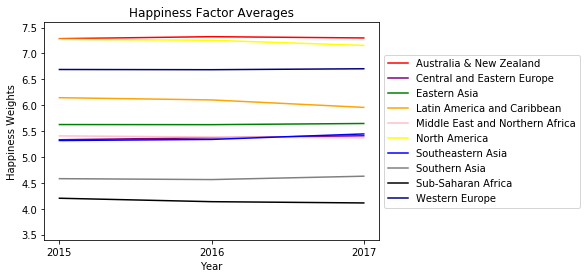

In [21]:
plt.subplots(1,sharex = True)
x = ['2015','2016','2017']
plt.plot(x,df_region_array['Australia & New Zealand'],color='red')
plt.plot(x,df_region_array['Central and Eastern Europe'],color='purple')
plt.plot(x,df_region_array['Eastern Asia'],color='green')
plt.plot(x,df_region_array['Latin America and Caribbean'],color='orange')
plt.plot(x,df_region_array['Middle East and Northern Africa'],color='pink')
plt.plot(x,df_region_array['North America'],color='yellow')
plt.plot(x,df_region_array['Southeastern Asia'],color='blue')
plt.plot(x,df_region_array['Southern Asia'],color='gray')
plt.plot(x,df_region_array['Sub-Saharan Africa'],color='black')
plt.plot(x,df_region_array['Western Europe'],color='navy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Happiness Factor Averages')
plt.xlabel('Year')
plt.ylim([3.4,7.6])
plt.ylabel('Happiness Weights')
plt.show()

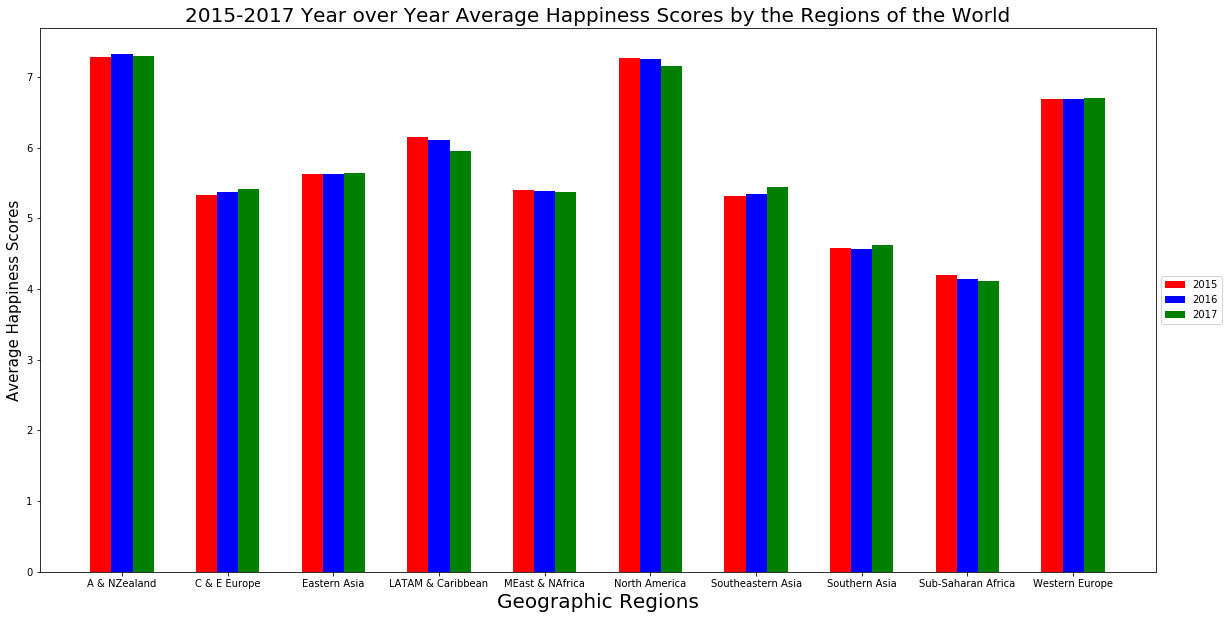

In [22]:
bar2015 = [7.285,5.3329,5.6262,6.1447,5.4069,7.273,5.3174,4.5809,4.2028,6.6896]
bar2016 = [7.3235,5.3707,5.6242,6.1018,5.3861,7.254,5.3389,4.5633,4.1364,6.6857]
bar2017 = [7.299,5.4099,5.6467,5.9578,5.3697,7.1545,5.4449,4.6284,4.1119,6.7037]
barWidth = 0.20
r1 = np.arange(len(bar2015))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.figure(figsize=(20,10))
plt.bar(r1,bar2015,color='red',width=barWidth,label='2015')
plt.bar(r2,bar2016,color='blue',width=barWidth,label='2016')
plt.bar(r3,bar2017,color='green',width=barWidth,label='2017')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([r + barWidth for r in range(len(bar2015))],
           ['A & NZealand','C & E Europe','Eastern Asia',
                              'LATAM & Caribbean','MEast & NAfrica','North America',
                              'Southeastern Asia','Southern Asia','Sub-Saharan Africa','Western Europe'])
plt.xlabel('Geographic Regions',size=20)
plt.ylabel('Average Happiness Scores',size=15)
plt.title('2015-2017 Year over Year Average Happiness Scores by the Regions of the World',size=20)
plt.show()

In [23]:
##Central and Eastern Europe and LATAM/Caribbean have opposite effects on their regional happiness
##What attributes to this? What are the factors involved?
##Averages of three top correlated variables 
CEE_2015 = data_2015[data_2015['Region'].isin(['Central and Eastern Europe'])]
CEE_2016 = data_2016[data_2016['Region'].isin(['Central and Eastern Europe'])]
CEE_2017 = data_2017[data_2017['Region'].isin(['Central and Eastern Europe'])]
LATAM_2015 = data_2015[data_2015['Region'].isin(['Latin America and Caribbean'])]
LATAM_2016 = data_2016[data_2016['Region'].isin(['Latin America and Caribbean'])]
LATAM_2017 = data_2017[data_2017['Region'].isin(['Latin America and Caribbean'])]
SEASIA_2015 = data_2015[data_2015['Region'].isin(['Southeastern Asia'])]
SEASIA_2016 = data_2016[data_2016['Region'].isin(['Southeastern Asia'])]
SEASIA_2017 = data_2017[data_2017['Region'].isin(['Southeastern Asia'])]
SSAFRICA_2015 = data_2015[data_2015['Region'].isin(['Sub-Saharan Africa'])]
SSAFRICA_2016 = data_2016[data_2016['Region'].isin(['Sub-Saharan Africa'])]
SSAFRICA_2017 = data_2017[data_2017['Region'].isin(['Sub-Saharan Africa'])]
NAMERICA_2015 = data_2015[data_2015['Region'].isin(['North America'])]
NAMERICA_2016 = data_2016[data_2016['Region'].isin(['North America'])]
NAMERICA_2017 = data_2017[data_2017['Region'].isin(['North America'])]

In [24]:
# Central and Eastern Europe's dataframe with top three correlated variables and its averages
CE_array = np.array([[2015,CEE_2015['HappinessScore'].mean(),CEE_2015['Economy_GDP'].mean(),
                             CEE_2015['Family'].mean(),CEE_2015['Health_LifeExp'].mean(),
                             CEE_2015['Freedom'].mean(),CEE_2015['Trust_GovtCorruption'].mean(),
                             CEE_2015['Generosity'].mean()],                     
                     [2016,CEE_2016['HappinessScore'].mean(),CEE_2016['Economy_GDP'].mean(),
                             CEE_2016['Family'].mean(),CEE_2016['Health_LifeExp'].mean(),
                             CEE_2016['Freedom'].mean(),CEE_2016['Trust_GovtCorruption'].mean(),
                             CEE_2016['Generosity'].mean()],
                     [2017,CEE_2017['HappinessScore'].mean(),CEE_2017['Economy_GDP'].mean(),
                             CEE_2017['Family'].mean(),CEE_2017['Health_LifeExp'].mean(),
                             CEE_2017['Freedom'].mean(),CEE_2017['Trust_GovtCorruption'].mean(),
                             CEE_2017['Generosity'].mean()]])
CE_avg_array = pd.DataFrame(CE_array)
CE_avg_array.columns = ['Year','HappinessScoreAvg','EconomyGDPAvg','FamilyAvg','Health_LifeExpAvg',
                              'FreedomAvg','Trust_GovtCorruptionAvg','GenerosityAvg']
# Latin America and Caribbean
LATAM_array = np.array([[2015,LATAM_2015['HappinessScore'].mean(),LATAM_2015['Economy_GDP'].mean(),
                             LATAM_2015['Family'].mean(),LATAM_2015['Health_LifeExp'].mean(),
                             LATAM_2015['Freedom'].mean(),LATAM_2015['Trust_GovtCorruption'].mean(),
                             LATAM_2015['Generosity'].mean()],                     
                     [2016,LATAM_2016['HappinessScore'].mean(),LATAM_2016['Economy_GDP'].mean(),
                             LATAM_2016['Family'].mean(),LATAM_2016['Health_LifeExp'].mean(),
                             LATAM_2016['Freedom'].mean(),LATAM_2016['Trust_GovtCorruption'].mean(),
                             LATAM_2016['Generosity'].mean()],
                     [2017,LATAM_2017['HappinessScore'].mean(),LATAM_2017['Economy_GDP'].mean(),
                             LATAM_2017['Family'].mean(),LATAM_2017['Health_LifeExp'].mean(),
                             LATAM_2017['Freedom'].mean(),LATAM_2017['Trust_GovtCorruption'].mean(),
                             LATAM_2017['Generosity'].mean()]])
LATAM_avg_array = pd.DataFrame(LATAM_array)
LATAM_avg_array.columns = ['Year','HappinessScoreAvg','EconomyGDPAvg','FamilyAvg','Health_LifeExpAvg',
                              'FreedomAvg','Trust_GovtCorruptionAvg','GenerosityAvg']
# Southeastern Asia
SEASIA_array = np.array([[2015,SEASIA_2015['HappinessScore'].mean(),SEASIA_2015['Economy_GDP'].mean(),
                             SEASIA_2015['Family'].mean(),SEASIA_2015['Health_LifeExp'].mean(),
                             SEASIA_2015['Freedom'].mean(),SEASIA_2015['Trust_GovtCorruption'].mean(),
                             SEASIA_2015['Generosity'].mean()],                     
                     [2016,SEASIA_2016['HappinessScore'].mean(),SEASIA_2016['Economy_GDP'].mean(),
                             SEASIA_2016['Family'].mean(),SEASIA_2016['Health_LifeExp'].mean(),
                             SEASIA_2016['Freedom'].mean(),SEASIA_2016['Trust_GovtCorruption'].mean(),
                             SEASIA_2016['Generosity'].mean()],
                     [2017,SEASIA_2017['HappinessScore'].mean(),SEASIA_2017['Economy_GDP'].mean(),
                             SEASIA_2017['Family'].mean(),SEASIA_2017['Health_LifeExp'].mean(),
                             SEASIA_2017['Freedom'].mean(),SEASIA_2017['Trust_GovtCorruption'].mean(),
                             SEASIA_2017['Generosity'].mean()]])
SEASIA_avg_array = pd.DataFrame(SEASIA_array)
SEASIA_avg_array.columns = ['Year','HappinessScoreAvg','EconomyGDPAvg','FamilyAvg','Health_LifeExpAvg',
                              'FreedomAvg','Trust_GovtCorruptionAvg','GenerosityAvg']
#Sub-saharan Africa
SSAFRICA_array = np.array([[2015,SSAFRICA_2015['HappinessScore'].mean(),SSAFRICA_2015['Economy_GDP'].mean(),
                             SSAFRICA_2015['Family'].mean(),SSAFRICA_2015['Health_LifeExp'].mean(),
                             SSAFRICA_2015['Freedom'].mean(),SSAFRICA_2015['Trust_GovtCorruption'].mean(),
                             SSAFRICA_2015['Generosity'].mean()],                     
                     [2016,SSAFRICA_2016['HappinessScore'].mean(),SSAFRICA_2016['Economy_GDP'].mean(),
                             SSAFRICA_2016['Family'].mean(),SSAFRICA_2016['Health_LifeExp'].mean(),
                             SSAFRICA_2016['Freedom'].mean(),SSAFRICA_2016['Trust_GovtCorruption'].mean(),
                             SSAFRICA_2016['Generosity'].mean()],
                     [2017,SSAFRICA_2017['HappinessScore'].mean(),SSAFRICA_2017['Economy_GDP'].mean(),
                             SSAFRICA_2017['Family'].mean(),SSAFRICA_2017['Health_LifeExp'].mean(),
                             SSAFRICA_2017['Freedom'].mean(),SSAFRICA_2017['Trust_GovtCorruption'].mean(),
                             SSAFRICA_2017['Generosity'].mean()]])
SSAFRICA_avg_array = pd.DataFrame(SSAFRICA_array)
SSAFRICA_avg_array.columns = ['Year','HappinessScoreAvg','EconomyGDPAvg','FamilyAvg','Health_LifeExpAvg',
                              'FreedomAvg','Trust_GovtCorruptionAvg','GenerosityAvg']
#North America
NAMERICA_array = np.array([[2015,NAMERICA_2015['HappinessScore'].mean(),NAMERICA_2015['Economy_GDP'].mean(),
                             NAMERICA_2015['Family'].mean(),NAMERICA_2015['Health_LifeExp'].mean(),
                             NAMERICA_2015['Freedom'].mean(),NAMERICA_2015['Trust_GovtCorruption'].mean(),
                             NAMERICA_2015['Generosity'].mean()],                     
                     [2016,NAMERICA_2016['HappinessScore'].mean(),NAMERICA_2016['Economy_GDP'].mean(),
                             NAMERICA_2016['Family'].mean(),NAMERICA_2016['Health_LifeExp'].mean(),
                             NAMERICA_2016['Freedom'].mean(),NAMERICA_2016['Trust_GovtCorruption'].mean(),
                             NAMERICA_2016['Generosity'].mean()],
                     [2017,NAMERICA_2017['HappinessScore'].mean(),NAMERICA_2017['Economy_GDP'].mean(),
                             NAMERICA_2017['Family'].mean(),NAMERICA_2017['Health_LifeExp'].mean(),
                             NAMERICA_2017['Freedom'].mean(),NAMERICA_2017['Trust_GovtCorruption'].mean(),
                             NAMERICA_2017['Generosity'].mean()]])
NAMERICA_avg_array = pd.DataFrame(NAMERICA_array)
NAMERICA_avg_array.columns = ['Year','HappinessScoreAvg','EconomyGDPAvg','FamilyAvg','Health_LifeExpAvg',
                              'FreedomAvg','Trust_GovtCorruptionAvg','GenerosityAvg']

### *Improving or Worsening Happiness Scores by the Region*

Looking at each region, I concluded four different regions to have polarizing Happiness Scores. The two improving regions were Central and Eastern Europe and Southeastern Asia and the two worsening scores were Latin America and Caribbean and Sub-Saharan Africa.

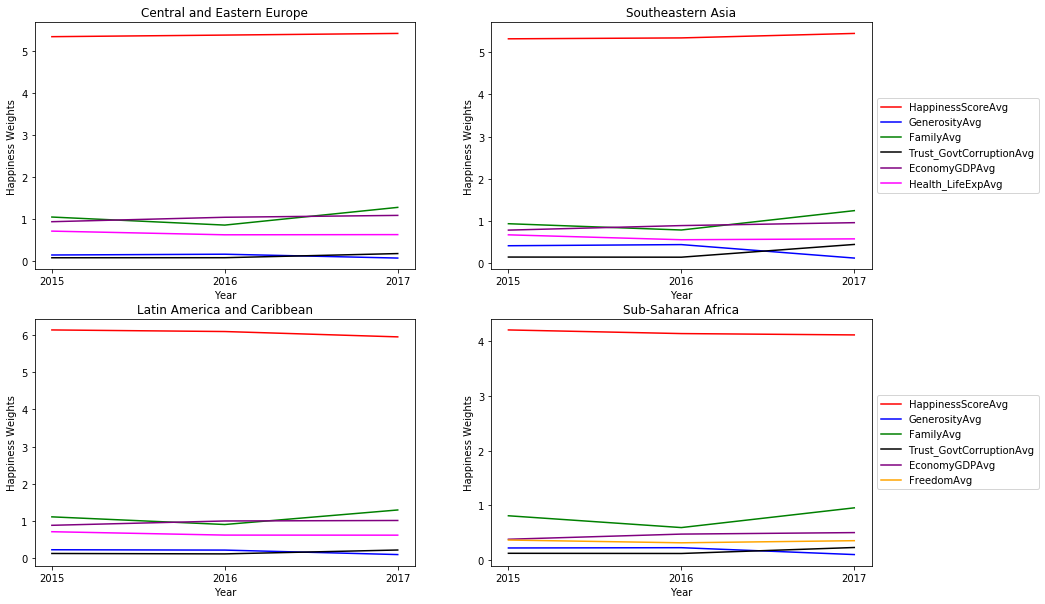

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
x = ['2015','2016','2017']
plt.plot(x,CE_avg_array['HappinessScoreAvg'],color='red')
plt.plot(x,CE_avg_array['GenerosityAvg'],color='blue')
plt.plot(x,CE_avg_array['FamilyAvg'],color='green')
plt.plot(x,CE_avg_array['Trust_GovtCorruptionAvg'],color='black')
plt.plot(x,CE_avg_array['EconomyGDPAvg'],color='purple')
plt.plot(x,CE_avg_array['Health_LifeExpAvg'],color='magenta')
plt.title('Central and Eastern Europe')
plt.xlabel('Year')
plt.ylabel('Happiness Weights')
plt.subplot(2,2,2)
plt.plot(x,SEASIA_avg_array['HappinessScoreAvg'],color='red')
plt.plot(x,SEASIA_avg_array['GenerosityAvg'],color='blue')
plt.plot(x,SEASIA_avg_array['FamilyAvg'],color='green')
plt.plot(x,SEASIA_avg_array['Trust_GovtCorruptionAvg'],color='black')
plt.plot(x,SEASIA_avg_array['EconomyGDPAvg'],color='purple')
plt.plot(x,SEASIA_avg_array['Health_LifeExpAvg'],color='magenta')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Southeastern Asia')
plt.xlabel('Year')
plt.ylabel('Happiness Weights')
plt.subplot(2,2,3)
plt.plot(x,LATAM_avg_array['HappinessScoreAvg'],color='red')
plt.plot(x,LATAM_avg_array['GenerosityAvg'],color='blue')
plt.plot(x,LATAM_avg_array['FamilyAvg'],color='green')
plt.plot(x,LATAM_avg_array['Trust_GovtCorruptionAvg'],color='black')
plt.plot(x,LATAM_avg_array['EconomyGDPAvg'],color='purple')
plt.plot(x,LATAM_avg_array['Health_LifeExpAvg'],color='magenta')
plt.title('Latin America and Caribbean')
plt.xlabel('Year')
plt.ylabel('Happiness Weights')
plt.subplot(2,2,4)
plt.plot(x,SSAFRICA_avg_array['HappinessScoreAvg'],color='red')
plt.plot(x,SSAFRICA_avg_array['GenerosityAvg'],color='blue')
plt.plot(x,SSAFRICA_avg_array['FamilyAvg'],color='green')
plt.plot(x,SSAFRICA_avg_array['Trust_GovtCorruptionAvg'],color='black')
plt.plot(x,SSAFRICA_avg_array['EconomyGDPAvg'],color='purple')
plt.plot(x,SSAFRICA_avg_array['FreedomAvg'],color='orange')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Sub-Saharan Africa')
plt.xlabel('Year')
plt.ylabel('Happiness Weights')
#plt.subplot(2,2,4)
#plt.plot(x,NAMERICA_avg_array['HappinessScoreAvg'],color='red')
#plt.plot(x,NAMERICA_avg_array['GenerosityAvg'],color='blue')
#plt.plot(x,NAMERICA_avg_array['FamilyAvg'],color='green')
#plt.plot(x,NAMERICA_avg_array['Trust_GovtCorruptionAvg'],color='black')
#plt.plot(x,NAMERICA_avg_array['EconomyGDPAvg'],color='purple')
#plt.plot(x,SSAFRICA_avg_array['Health_LifeExpAvg'],color='magenta')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title('North America')
#plt.xlabel('Year')
#plt.ylabel('Happiness Weights')
plt.show()

In [30]:
CE_avg_array

,Year,HappinessScoreAvg,EconomyGDPAvg,FamilyAvg,Health_LifeExpAvg,FreedomAvg,Trust_GovtCorruptionAvg,GenerosityAvg
0,2015.0,5.332931,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264
1,2016.0,5.370690,1.047537,0.861855,0.631592,0.300528,0.088072,0.170898
2,2017.0,5.409931,1.092051,1.282285,0.636090,0.346609,0.186116,0.079620


In [28]:
SEASIA_avg_array

,Year,HappinessScoreAvg,EconomyGDPAvg,FamilyAvg,Health_LifeExpAvg,FreedomAvg,Trust_GovtCorruptionAvg,GenerosityAvg
0,2015.0,5.317444,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261
1,2016.0,5.338889,0.896381,0.791756,0.561369,0.490123,0.148104,0.446150
2,2017.0,5.444875,0.965253,1.249948,0.581918,0.534971,0.449860,0.127591


In [29]:
LATAM_avg_array

,Year,HappinessScoreAvg,EconomyGDPAvg,FamilyAvg,Health_LifeExpAvg,FreedomAvg,Trust_GovtCorruptionAvg,GenerosityAvg
0,2015.0,6.144682,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788
1,2016.0,6.101750,0.993410,0.898432,0.612703,0.426646,0.106016,0.208428
2,2017.0,5.957818,1.006981,1.290156,0.611009,0.449222,0.210696,0.087764


In [27]:
SSAFRICA_avg_array

,Year,HappinessScoreAvg,EconomyGDPAvg,FamilyAvg,Health_LifeExpAvg,FreedomAvg,Trust_GovtCorruptionAvg,GenerosityAvg
0,2015.0,4.202800,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137
1,2016.0,4.136421,0.474321,0.593656,0.239872,0.315424,0.120379,0.226348
2,2017.0,4.111949,0.501749,0.953919,0.224766,0.354104,0.229599,0.100579


### *Conclusion*

Interestingly for all four regions, despite two of the three strongest correlated variables showing indications of improving Happiness Scores with improvements in "Economy_GDP" and "Family" and worsening "Life Expectancy", Happiness Scores within the regions polarized in different directions. We see in all four regions citizens having better "Trust in Government" and all four regions experiencing declining "Generosity" over the three year period, yet their happiness scores were different all around. 

This did not persay show me much about the regions themselves. Happiness Scores for LATAM and the Carribean were also already much higher to begin with than the two improving regions so their scores were biased in some way to begin with. Quite possibly, however, this leads to a better assumption about the entire dataset that many citizens globally must have similar outlooks as to what their happiness is comprised of and that no matter what their country experienced, the data is intrinsically limited in the evaluation of a citizen's happiness with their country. It would be better to look less against the trends of data but instead more about the numbers themselves - Central and Eastern Europe's "Economy GDP" numbers were higher than LATAM and Caribbean yet LATAM and Caribbean's "Freedom" scores were way higher - does this have any indication to a citizen's survey? We can also look at Sub-Saharan Africa and their life-expectancy scores and most likely infer that their health care system is far more limited than in the other regions which most likely have a large pull against their Happiness Score, regardless of how correlated that variable might be.

All in all, there are things the dataset could not explain and this question begs to probe at what factors within a region attributed to their happiness. The conclusion I got is that it is hard to really know without understanding what those questions were given how similarly these characteristics trended. There are more things that are systematic about the regions that affected these scores which is interesting to look more into.

## Question 3 - Within the four regions, what were specifically the top three countries that experienced the most dramatic improvements/declines in Happiness Scores and what were their specific categorical improvements/declines?

In the similar theme of regional improvements, I wanted to hone in on specific countries that experienced the most dramatic Happiness Score changes. By filtering the data by the region and their largest differences of their year-to-year Happiness Scores, I was able to see which countries specifically experiencing those largest swings. After, I looked into what their categorical differences were using a scatter graph for each region, color-coordinated by the country and each distinct mark distinguished by the different year.

2015 = X

2016 = Triangle

2017 = Circle

In [31]:
bulgaria = data_yoy[data_yoy['Country'].isin(['Bulgaria'])]
latvia = data_yoy[data_yoy['Country'].isin(['Latvia'])]
romania = data_yoy[data_yoy['Country'].isin(['Romania'])]
philippines = data_yoy[data_yoy['Country'].isin(['Philippines'])]
cambodia = data_yoy[data_yoy['Country'].isin(['Cambodia'])]
malaysia = data_yoy[data_yoy['Country'].isin(['Malaysia'])]
venezuela = data_yoy[data_yoy['Country'].isin(['Venezuela'])]
haiti = data_yoy[data_yoy['Country'].isin(['Haiti'])]
mexico = data_yoy[data_yoy['Country'].isin(['Mexico'])]
liberia = data_yoy[data_yoy['Country'].isin(['Liberia'])]
zimbabwe = data_yoy[data_yoy['Country'].isin(['Zimbabwe'])]
zambia = data_yoy[data_yoy['Country'].isin(['Zambia'])]

#### *Central and Eastern Europe*

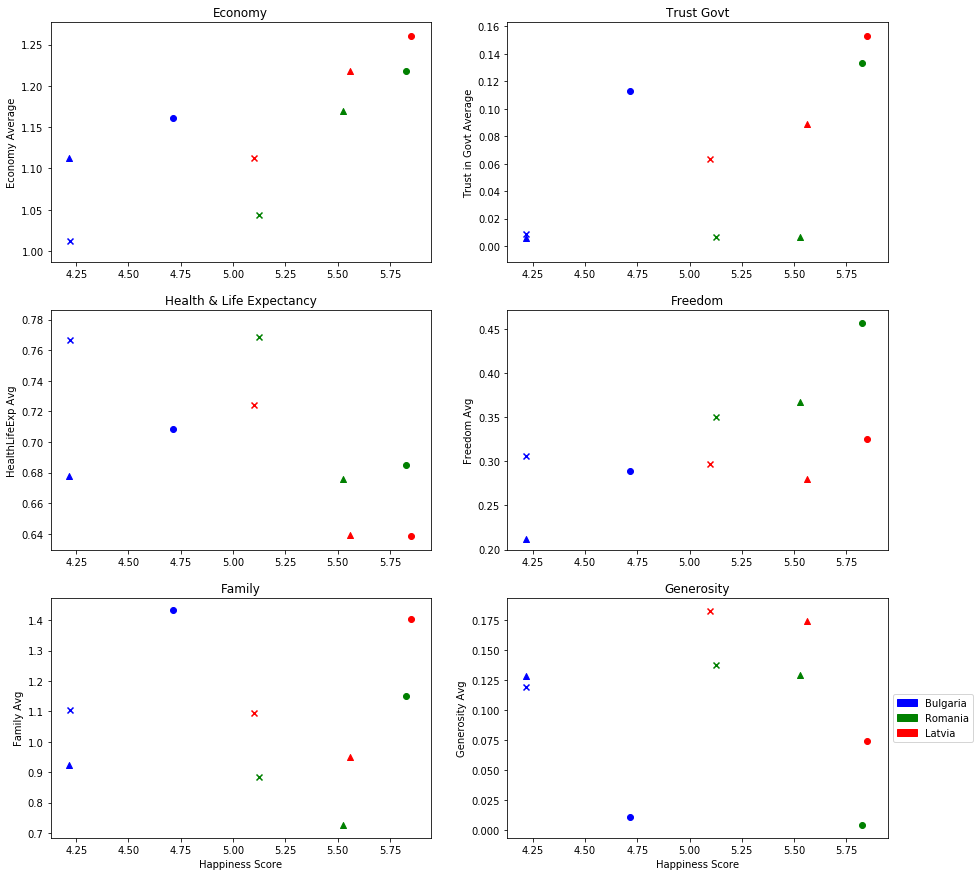

In [36]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.scatter(bulgaria.HappinessScore2015,bulgaria.EconomyAvg_2015,color='blue',marker="x")
plt.scatter(bulgaria.HappinessScore2016,bulgaria.EconomyAvg_2016,color='blue',marker="^")
plt.scatter(bulgaria.HappinessScore2017,bulgaria.EconomyAvg_2017,color='blue',marker="o")
plt.scatter(romania.HappinessScore2015,romania.EconomyAvg_2015,color='green',marker="x")
plt.scatter(romania.HappinessScore2016,romania.EconomyAvg_2016,color='green',marker="^")
plt.scatter(romania.HappinessScore2017,romania.EconomyAvg_2017,color='green',marker="o")
plt.scatter(latvia.HappinessScore2015,latvia.EconomyAvg_2015,color='red',marker="x")
plt.scatter(latvia.HappinessScore2016,latvia.EconomyAvg_2016,color='red',marker="^")
plt.scatter(latvia.HappinessScore2017,latvia.EconomyAvg_2017,color='red',marker="o")
plt.title('Economy')
#plt.xlabel('Happiness Score')
plt.ylabel('Economy Average')
plt.subplot(3,2,2)
plt.scatter(bulgaria.HappinessScore2015,bulgaria.TrustGovtAvg_2015,color='blue',marker="x")
plt.scatter(bulgaria.HappinessScore2016,bulgaria.TrustGovtAvg_2016,color='blue',marker="^")
plt.scatter(bulgaria.HappinessScore2017,bulgaria.TrustGovtAvg_2017,color='blue',marker="o")
plt.scatter(romania.HappinessScore2015,romania.TrustGovtAvg_2015,color='green',marker="x")
plt.scatter(romania.HappinessScore2016,romania.TrustGovtAvg_2016,color='green',marker="^")
plt.scatter(romania.HappinessScore2017,romania.TrustGovtAvg_2017,color='green',marker="o")
plt.scatter(latvia.HappinessScore2015,latvia.TrustGovtAvg_2015,color='red',marker="x")
plt.scatter(latvia.HappinessScore2016,latvia.TrustGovtAvg_2016,color='red',marker="^")
plt.scatter(latvia.HappinessScore2017,latvia.TrustGovtAvg_2017,color='red',marker="o")
plt.title('Trust Govt')
#plt.xlabel('Happiness Score')
plt.ylabel('Trust in Govt Average')
plt.subplot(3,2,3)
plt.scatter(bulgaria.HappinessScore2015,bulgaria.HealthLifeExpAvg_2015,color='blue',marker="x")
plt.scatter(bulgaria.HappinessScore2016,bulgaria.HealthLifeExpAvg_2016,color='blue',marker="^")
plt.scatter(bulgaria.HappinessScore2017,bulgaria.HealthLifeExpAvg_2017,color='blue',marker="o")
plt.scatter(romania.HappinessScore2015,romania.HealthLifeExpAvg_2015,color='green',marker="x")
plt.scatter(romania.HappinessScore2016,romania.HealthLifeExpAvg_2016,color='green',marker="^")
plt.scatter(romania.HappinessScore2017,romania.HealthLifeExpAvg_2017,color='green',marker="o")
plt.scatter(latvia.HappinessScore2015,latvia.HealthLifeExpAvg_2015,color='red',marker="x")
plt.scatter(latvia.HappinessScore2016,latvia.HealthLifeExpAvg_2016,color='red',marker="^")
plt.scatter(latvia.HappinessScore2017,latvia.HealthLifeExpAvg_2017,color='red',marker="o")
plt.title('Health & Life Expectancy')
#plt.xlabel('Happiness Score')
plt.ylabel('HealthLifeExp Avg')
plt.subplot(3,2,4)
plt.scatter(bulgaria.HappinessScore2015,bulgaria.FreedomAvg_2015,color='blue',marker="x")
plt.scatter(bulgaria.HappinessScore2016,bulgaria.FreedomAvg_2016,color='blue',marker="^")
plt.scatter(bulgaria.HappinessScore2017,bulgaria.FreedomAvg_2017,color='blue',marker="o")
plt.scatter(romania.HappinessScore2015,romania.FreedomAvg_2015,color='green',marker="x")
plt.scatter(romania.HappinessScore2016,romania.FreedomAvg_2016,color='green',marker="^")
plt.scatter(romania.HappinessScore2017,romania.FreedomAvg_2017,color='green',marker="o")
plt.scatter(latvia.HappinessScore2015,latvia.FreedomAvg_2015,color='red',marker="x")
plt.scatter(latvia.HappinessScore2016,latvia.FreedomAvg_2016,color='red',marker="^")
plt.scatter(latvia.HappinessScore2017,latvia.FreedomAvg_2017,color='red',marker="o")
plt.title('Freedom')
#plt.xlabel('Happiness Score')
plt.ylabel('Freedom Avg')
plt.subplot(3,2,5)
plt.scatter(bulgaria.HappinessScore2015,bulgaria.FamilyAvg_2015,color='blue',marker="x")
plt.scatter(bulgaria.HappinessScore2016,bulgaria.FamilyAvg_2016,color='blue',marker="^")
plt.scatter(bulgaria.HappinessScore2017,bulgaria.FamilyAvg_2017,color='blue',marker="o")
plt.scatter(romania.HappinessScore2015,romania.FamilyAvg_2015,color='green',marker="x")
plt.scatter(romania.HappinessScore2016,romania.FamilyAvg_2016,color='green',marker="^")
plt.scatter(romania.HappinessScore2017,romania.FamilyAvg_2017,color='green',marker="o")
plt.scatter(latvia.HappinessScore2015,latvia.FamilyAvg_2015,color='red',marker="x")
plt.scatter(latvia.HappinessScore2016,latvia.FamilyAvg_2016,color='red',marker="^")
plt.scatter(latvia.HappinessScore2017,latvia.FamilyAvg_2017,color='red',marker="o")
plt.title('Family')
plt.xlabel('Happiness Score')
plt.ylabel('Family Avg')
plt.subplot(3,2,6)
plt.scatter(bulgaria.HappinessScore2015,bulgaria.GenerosityAvg_2015,color='blue',marker="x")
plt.scatter(bulgaria.HappinessScore2016,bulgaria.GenerosityAvg_2016,color='blue',marker="^")
plt.scatter(bulgaria.HappinessScore2017,bulgaria.GenerosityAvg_2017,color='blue',marker="o")
plt.scatter(romania.HappinessScore2015,romania.GenerosityAvg_2015,color='green',marker="x")
plt.scatter(romania.HappinessScore2016,romania.GenerosityAvg_2016,color='green',marker="^")
plt.scatter(romania.HappinessScore2017,romania.GenerosityAvg_2017,color='green',marker="o")
plt.scatter(latvia.HappinessScore2015,latvia.GenerosityAvg_2015,color='red',marker="x")
plt.scatter(latvia.HappinessScore2016,latvia.GenerosityAvg_2016,color='red',marker="^")
plt.scatter(latvia.HappinessScore2017,latvia.GenerosityAvg_2017,color='red',marker="o")
plt.title('Generosity')
plt.xlabel('Happiness Score')
plt.ylabel('Generosity Avg')
blue_mark = mpatches.Patch(color='blue',label='Bulgaria')
green_mark = mpatches.Patch(color='green',label='Romania')
red_mark = mpatches.Patch(color='red',label='Latvia')
plt.legend(handles=[blue_mark,green_mark,red_mark],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### *Southeastern Asia*

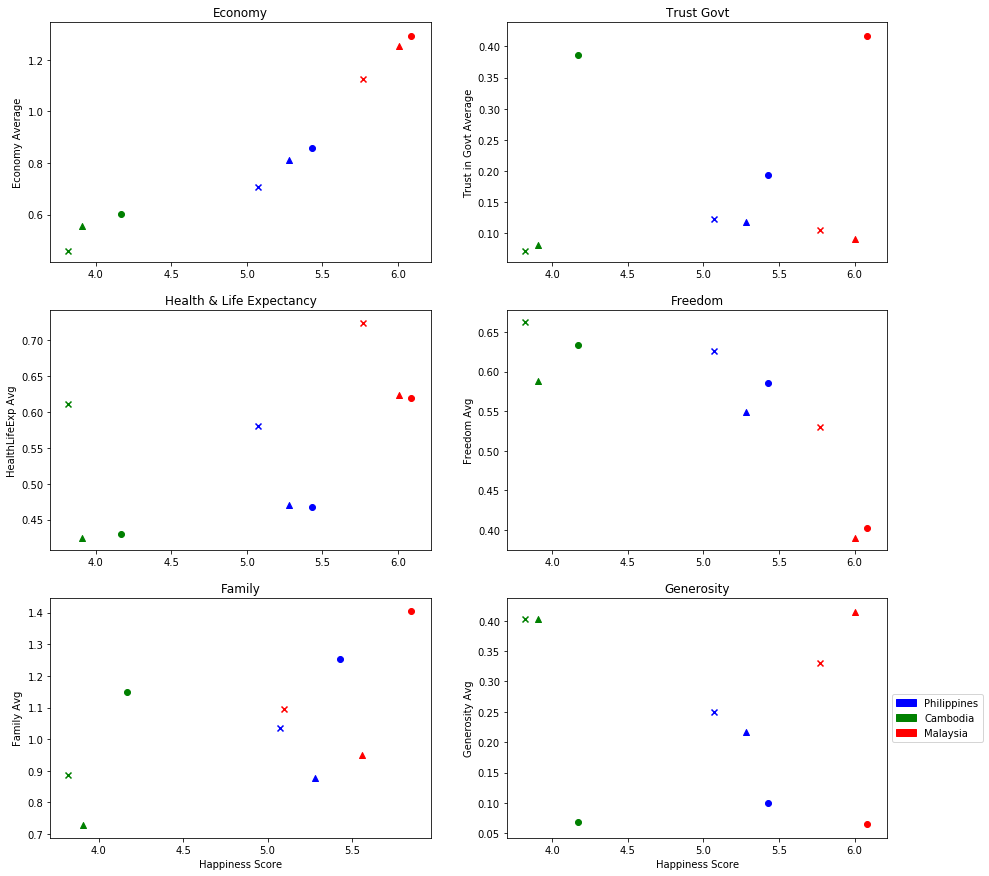

In [37]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.scatter(philippines.HappinessScore2015,philippines.EconomyAvg_2015,color='blue',marker="x")
plt.scatter(philippines.HappinessScore2016,philippines.EconomyAvg_2016,color='blue',marker="^")
plt.scatter(philippines.HappinessScore2017,philippines.EconomyAvg_2017,color='blue',marker="o")
plt.scatter(cambodia.HappinessScore2015,cambodia.EconomyAvg_2015,color='green',marker="x")
plt.scatter(cambodia.HappinessScore2016,cambodia.EconomyAvg_2016,color='green',marker="^")
plt.scatter(cambodia.HappinessScore2017,cambodia.EconomyAvg_2017,color='green',marker="o")
plt.scatter(malaysia.HappinessScore2015,malaysia.EconomyAvg_2015,color='red',marker="x")
plt.scatter(malaysia.HappinessScore2016,malaysia.EconomyAvg_2016,color='red',marker="^")
plt.scatter(malaysia.HappinessScore2017,malaysia.EconomyAvg_2017,color='red',marker="o")
plt.title('Economy')
#plt.xlabel('Happiness Score')
plt.ylabel('Economy Average')
plt.subplot(3,2,2)
plt.scatter(philippines.HappinessScore2015,philippines.TrustGovtAvg_2015,color='blue',marker="x")
plt.scatter(philippines.HappinessScore2016,philippines.TrustGovtAvg_2016,color='blue',marker="^")
plt.scatter(philippines.HappinessScore2017,philippines.TrustGovtAvg_2017,color='blue',marker="o")
plt.scatter(cambodia.HappinessScore2015,cambodia.TrustGovtAvg_2015,color='green',marker="x")
plt.scatter(cambodia.HappinessScore2016,cambodia.TrustGovtAvg_2016,color='green',marker="^")
plt.scatter(cambodia.HappinessScore2017,cambodia.TrustGovtAvg_2017,color='green',marker="o")
plt.scatter(malaysia.HappinessScore2015,malaysia.TrustGovtAvg_2015,color='red',marker="x")
plt.scatter(malaysia.HappinessScore2016,malaysia.TrustGovtAvg_2016,color='red',marker="^")
plt.scatter(malaysia.HappinessScore2017,malaysia.TrustGovtAvg_2017,color='red',marker="o")
plt.title('Trust Govt')
#plt.xlabel('Happiness Score')
plt.ylabel('Trust in Govt Average')
plt.subplot(3,2,3)
plt.scatter(philippines.HappinessScore2015,philippines.HealthLifeExpAvg_2015,color='blue',marker="x")
plt.scatter(philippines.HappinessScore2016,philippines.HealthLifeExpAvg_2016,color='blue',marker="^")
plt.scatter(philippines.HappinessScore2017,philippines.HealthLifeExpAvg_2017,color='blue',marker="o")
plt.scatter(cambodia.HappinessScore2015,cambodia.HealthLifeExpAvg_2015,color='green',marker="x")
plt.scatter(cambodia.HappinessScore2016,cambodia.HealthLifeExpAvg_2016,color='green',marker="^")
plt.scatter(cambodia.HappinessScore2017,cambodia.HealthLifeExpAvg_2017,color='green',marker="o")
plt.scatter(malaysia.HappinessScore2015,malaysia.HealthLifeExpAvg_2015,color='red',marker="x")
plt.scatter(malaysia.HappinessScore2016,malaysia.HealthLifeExpAvg_2016,color='red',marker="^")
plt.scatter(malaysia.HappinessScore2017,malaysia.HealthLifeExpAvg_2017,color='red',marker="o")
plt.title('Health & Life Expectancy')
#plt.xlabel('Happiness Score')
plt.ylabel('HealthLifeExp Avg')
plt.subplot(3,2,4)
plt.scatter(philippines.HappinessScore2015,philippines.FreedomAvg_2015,color='blue',marker="x")
plt.scatter(philippines.HappinessScore2016,philippines.FreedomAvg_2016,color='blue',marker="^")
plt.scatter(philippines.HappinessScore2017,philippines.FreedomAvg_2017,color='blue',marker="o")
plt.scatter(cambodia.HappinessScore2015,cambodia.FreedomAvg_2015,color='green',marker="x")
plt.scatter(cambodia.HappinessScore2016,cambodia.FreedomAvg_2016,color='green',marker="^")
plt.scatter(cambodia.HappinessScore2017,cambodia.FreedomAvg_2017,color='green',marker="o")
plt.scatter(malaysia.HappinessScore2015,malaysia.FreedomAvg_2015,color='red',marker="x")
plt.scatter(malaysia.HappinessScore2016,malaysia.FreedomAvg_2016,color='red',marker="^")
plt.scatter(malaysia.HappinessScore2017,malaysia.FreedomAvg_2017,color='red',marker="o")
plt.title('Freedom')
#plt.xlabel('Happiness Score')
plt.ylabel('Freedom Avg')
plt.subplot(3,2,5)
plt.scatter(philippines.HappinessScore2015,philippines.FamilyAvg_2015,color='blue',marker="x")
plt.scatter(philippines.HappinessScore2016,philippines.FamilyAvg_2016,color='blue',marker="^")
plt.scatter(philippines.HappinessScore2017,philippines.FamilyAvg_2017,color='blue',marker="o")
plt.scatter(cambodia.HappinessScore2015,romania.FamilyAvg_2015,color='green',marker="x")
plt.scatter(cambodia.HappinessScore2016,romania.FamilyAvg_2016,color='green',marker="^")
plt.scatter(cambodia.HappinessScore2017,romania.FamilyAvg_2017,color='green',marker="o")
plt.scatter(latvia.HappinessScore2015,latvia.FamilyAvg_2015,color='red',marker="x")
plt.scatter(latvia.HappinessScore2016,latvia.FamilyAvg_2016,color='red',marker="^")
plt.scatter(latvia.HappinessScore2017,latvia.FamilyAvg_2017,color='red',marker="o")
plt.title('Family')
plt.xlabel('Happiness Score')
plt.ylabel('Family Avg')
plt.subplot(3,2,6)
plt.scatter(philippines.HappinessScore2015,philippines.GenerosityAvg_2015,color='blue',marker="x")
plt.scatter(philippines.HappinessScore2016,philippines.GenerosityAvg_2016,color='blue',marker="^")
plt.scatter(philippines.HappinessScore2017,philippines.GenerosityAvg_2017,color='blue',marker="o")
plt.scatter(cambodia.HappinessScore2015,cambodia.GenerosityAvg_2015,color='green',marker="x")
plt.scatter(cambodia.HappinessScore2016,cambodia.GenerosityAvg_2016,color='green',marker="^")
plt.scatter(cambodia.HappinessScore2017,cambodia.GenerosityAvg_2017,color='green',marker="o")
plt.scatter(malaysia.HappinessScore2015,malaysia.GenerosityAvg_2015,color='red',marker="x")
plt.scatter(malaysia.HappinessScore2016,malaysia.GenerosityAvg_2016,color='red',marker="^")
plt.scatter(malaysia.HappinessScore2017,malaysia.GenerosityAvg_2017,color='red',marker="o")
plt.title('Generosity')
plt.xlabel('Happiness Score')
plt.ylabel('Generosity Avg')
blue_mark = mpatches.Patch(color='blue',label='Philippines')
green_mark = mpatches.Patch(color='green',label='Cambodia')
red_mark = mpatches.Patch(color='red',label='Malaysia')
plt.legend(handles=[blue_mark,green_mark,red_mark],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### *Latin America and Caribbean*

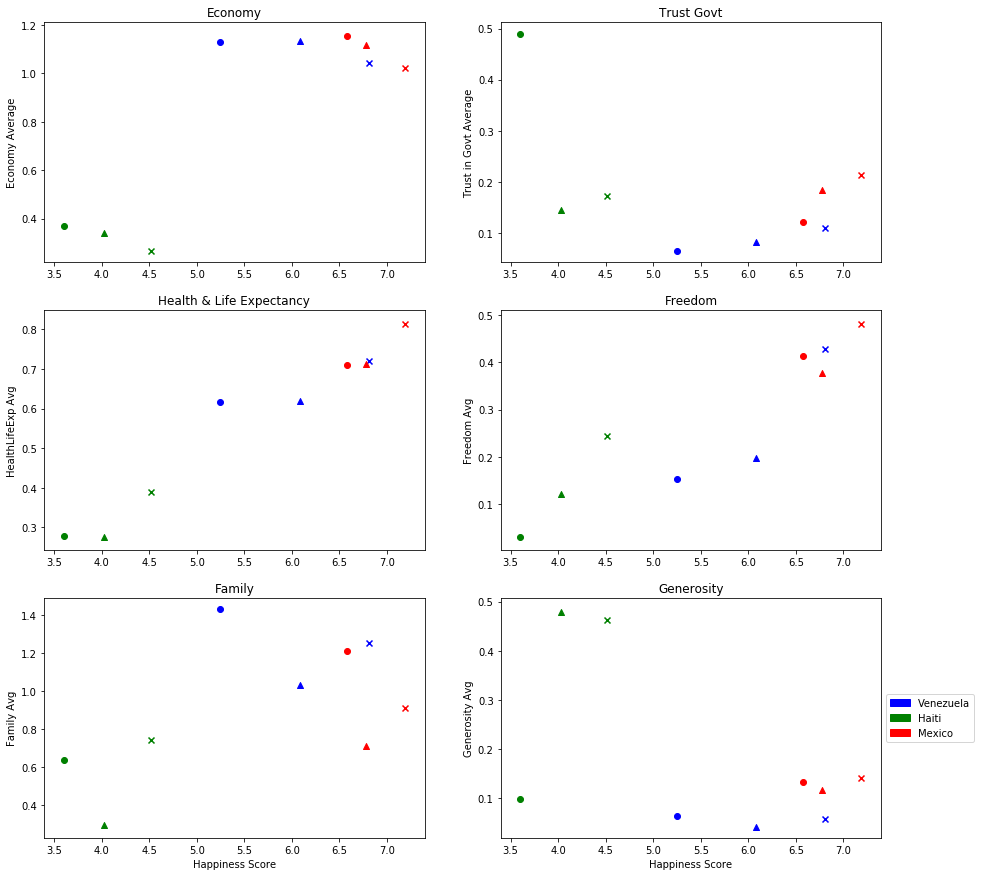

In [38]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.scatter(venezuela.HappinessScore2015,venezuela.EconomyAvg_2015,color='blue',marker="x")
plt.scatter(venezuela.HappinessScore2016,venezuela.EconomyAvg_2016,color='blue',marker="^")
plt.scatter(venezuela.HappinessScore2017,venezuela.EconomyAvg_2017,color='blue',marker="o")
plt.scatter(haiti.HappinessScore2015,haiti.EconomyAvg_2015,color='green',marker="x")
plt.scatter(haiti.HappinessScore2016,haiti.EconomyAvg_2016,color='green',marker="^")
plt.scatter(haiti.HappinessScore2017,haiti.EconomyAvg_2017,color='green',marker="o")
plt.scatter(mexico.HappinessScore2015,mexico.EconomyAvg_2015,color='red',marker="x")
plt.scatter(mexico.HappinessScore2016,mexico.EconomyAvg_2016,color='red',marker="^")
plt.scatter(mexico.HappinessScore2017,mexico.EconomyAvg_2017,color='red',marker="o")
plt.title('Economy')
#plt.xlabel('Happiness Score')
plt.ylabel('Economy Average')
plt.subplot(3,2,2)
plt.scatter(venezuela.HappinessScore2015,venezuela.TrustGovtAvg_2015,color='blue',marker="x")
plt.scatter(venezuela.HappinessScore2016,venezuela.TrustGovtAvg_2016,color='blue',marker="^")
plt.scatter(venezuela.HappinessScore2017,venezuela.TrustGovtAvg_2017,color='blue',marker="o")
plt.scatter(haiti.HappinessScore2015,haiti.TrustGovtAvg_2015,color='green',marker="x")
plt.scatter(haiti.HappinessScore2016,haiti.TrustGovtAvg_2016,color='green',marker="^")
plt.scatter(haiti.HappinessScore2017,haiti.TrustGovtAvg_2017,color='green',marker="o")
plt.scatter(mexico.HappinessScore2015,mexico.TrustGovtAvg_2015,color='red',marker="x")
plt.scatter(mexico.HappinessScore2016,mexico.TrustGovtAvg_2016,color='red',marker="^")
plt.scatter(mexico.HappinessScore2017,mexico.TrustGovtAvg_2017,color='red',marker="o")
plt.title('Trust Govt')
#plt.xlabel('Happiness Score')
plt.ylabel('Trust in Govt Average')
plt.subplot(3,2,3)
plt.scatter(venezuela.HappinessScore2015,venezuela.HealthLifeExpAvg_2015,color='blue',marker="x")
plt.scatter(venezuela.HappinessScore2016,venezuela.HealthLifeExpAvg_2016,color='blue',marker="^")
plt.scatter(venezuela.HappinessScore2017,venezuela.HealthLifeExpAvg_2017,color='blue',marker="o")
plt.scatter(haiti.HappinessScore2015,haiti.HealthLifeExpAvg_2015,color='green',marker="x")
plt.scatter(haiti.HappinessScore2016,haiti.HealthLifeExpAvg_2016,color='green',marker="^")
plt.scatter(haiti.HappinessScore2017,haiti.HealthLifeExpAvg_2017,color='green',marker="o")
plt.scatter(mexico.HappinessScore2015,mexico.HealthLifeExpAvg_2015,color='red',marker="x")
plt.scatter(mexico.HappinessScore2016,mexico.HealthLifeExpAvg_2016,color='red',marker="^")
plt.scatter(mexico.HappinessScore2017,mexico.HealthLifeExpAvg_2017,color='red',marker="o")
plt.title('Health & Life Expectancy')
#plt.xlabel('Happiness Score')
plt.ylabel('HealthLifeExp Avg')
plt.subplot(3,2,4)
plt.scatter(venezuela.HappinessScore2015,venezuela.FreedomAvg_2015,color='blue',marker="x")
plt.scatter(venezuela.HappinessScore2016,venezuela.FreedomAvg_2016,color='blue',marker="^")
plt.scatter(venezuela.HappinessScore2017,venezuela.FreedomAvg_2017,color='blue',marker="o")
plt.scatter(haiti.HappinessScore2015,haiti.FreedomAvg_2015,color='green',marker="x")
plt.scatter(haiti.HappinessScore2016,haiti.FreedomAvg_2016,color='green',marker="^")
plt.scatter(haiti.HappinessScore2017,haiti.FreedomAvg_2017,color='green',marker="o")
plt.scatter(mexico.HappinessScore2015,mexico.FreedomAvg_2015,color='red',marker="x")
plt.scatter(mexico.HappinessScore2016,mexico.FreedomAvg_2016,color='red',marker="^")
plt.scatter(mexico.HappinessScore2017,mexico.FreedomAvg_2017,color='red',marker="o")
plt.title('Freedom')
#plt.xlabel('Happiness Score')
plt.ylabel('Freedom Avg')
plt.subplot(3,2,5)
plt.scatter(venezuela.HappinessScore2015,venezuela.FamilyAvg_2015,color='blue',marker="x")
plt.scatter(venezuela.HappinessScore2016,venezuela.FamilyAvg_2016,color='blue',marker="^")
plt.scatter(venezuela.HappinessScore2017,venezuela.FamilyAvg_2017,color='blue',marker="o")
plt.scatter(haiti.HappinessScore2015,haiti.FamilyAvg_2015,color='green',marker="x")
plt.scatter(haiti.HappinessScore2016,haiti.FamilyAvg_2016,color='green',marker="^")
plt.scatter(haiti.HappinessScore2017,haiti.FamilyAvg_2017,color='green',marker="o")
plt.scatter(mexico.HappinessScore2015,mexico.FamilyAvg_2015,color='red',marker="x")
plt.scatter(mexico.HappinessScore2016,mexico.FamilyAvg_2016,color='red',marker="^")
plt.scatter(mexico.HappinessScore2017,mexico.FamilyAvg_2017,color='red',marker="o")
plt.title('Family')
plt.xlabel('Happiness Score')
plt.ylabel('Family Avg')
plt.subplot(3,2,6)
plt.scatter(venezuela.HappinessScore2015,venezuela.GenerosityAvg_2015,color='blue',marker="x")
plt.scatter(venezuela.HappinessScore2016,venezuela.GenerosityAvg_2016,color='blue',marker="^")
plt.scatter(venezuela.HappinessScore2017,venezuela.GenerosityAvg_2017,color='blue',marker="o")
plt.scatter(haiti.HappinessScore2015,haiti.GenerosityAvg_2015,color='green',marker="x")
plt.scatter(haiti.HappinessScore2016,haiti.GenerosityAvg_2016,color='green',marker="^")
plt.scatter(haiti.HappinessScore2017,haiti.GenerosityAvg_2017,color='green',marker="o")
plt.scatter(mexico.HappinessScore2015,mexico.GenerosityAvg_2015,color='red',marker="x")
plt.scatter(mexico.HappinessScore2016,mexico.GenerosityAvg_2016,color='red',marker="^")
plt.scatter(mexico.HappinessScore2017,mexico.GenerosityAvg_2017,color='red',marker="o")
plt.title('Generosity')
plt.xlabel('Happiness Score')
plt.ylabel('Generosity Avg')
blue_mark = mpatches.Patch(color='blue',label='Venezuela')
green_mark = mpatches.Patch(color='green',label='Haiti')
red_mark = mpatches.Patch(color='red',label='Mexico')
plt.legend(handles=[blue_mark,green_mark,red_mark],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### *Sub-Saharan Africa*

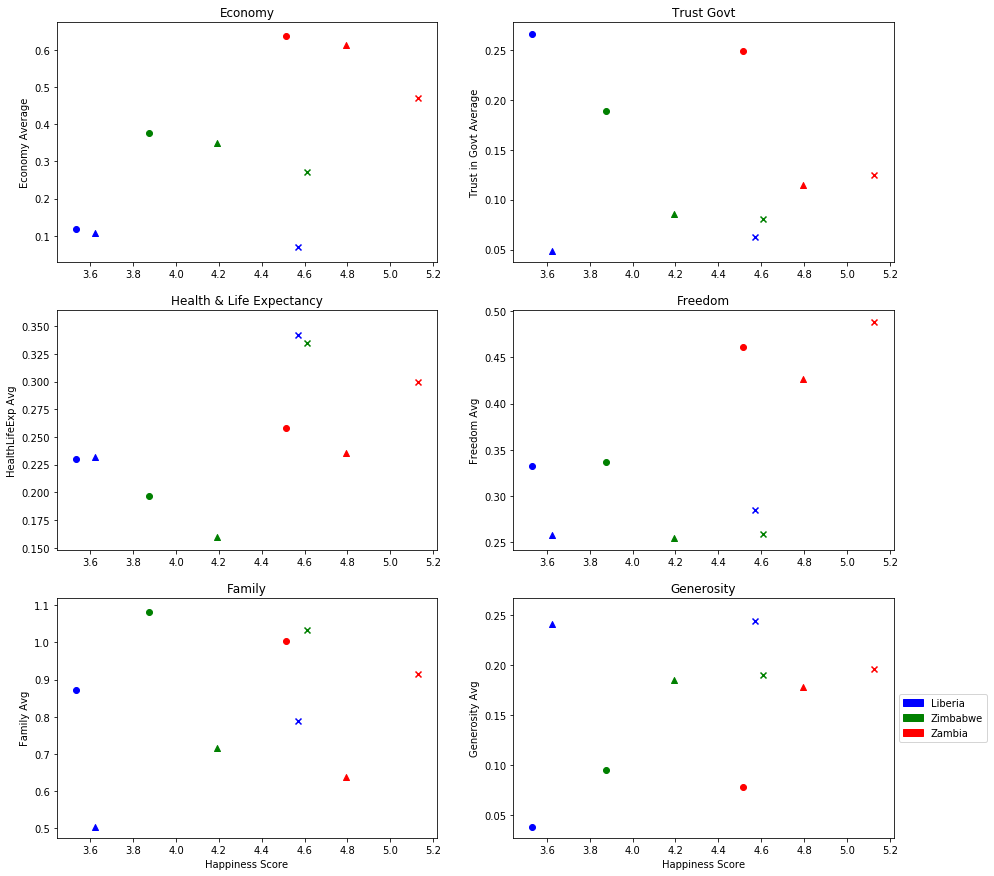

In [39]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.scatter(liberia.HappinessScore2015,liberia.EconomyAvg_2015,color='blue',marker="x")
plt.scatter(liberia.HappinessScore2016,liberia.EconomyAvg_2016,color='blue',marker="^")
plt.scatter(liberia.HappinessScore2017,liberia.EconomyAvg_2017,color='blue',marker="o")
plt.scatter(zimbabwe.HappinessScore2015,zimbabwe.EconomyAvg_2015,color='green',marker="x")
plt.scatter(zimbabwe.HappinessScore2016,zimbabwe.EconomyAvg_2016,color='green',marker="^")
plt.scatter(zimbabwe.HappinessScore2017,zimbabwe.EconomyAvg_2017,color='green',marker="o")
plt.scatter(zambia.HappinessScore2015,zambia.EconomyAvg_2015,color='red',marker="x")
plt.scatter(zambia.HappinessScore2016,zambia.EconomyAvg_2016,color='red',marker="^")
plt.scatter(zambia.HappinessScore2017,zambia.EconomyAvg_2017,color='red',marker="o")
plt.title('Economy')
#plt.xlabel('Happiness Score')
plt.ylabel('Economy Average')
plt.subplot(3,2,2)
plt.scatter(liberia.HappinessScore2015,liberia.TrustGovtAvg_2015,color='blue',marker="x")
plt.scatter(liberia.HappinessScore2016,liberia.TrustGovtAvg_2016,color='blue',marker="^")
plt.scatter(liberia.HappinessScore2017,liberia.TrustGovtAvg_2017,color='blue',marker="o")
plt.scatter(zimbabwe.HappinessScore2015,zimbabwe.TrustGovtAvg_2015,color='green',marker="x")
plt.scatter(zimbabwe.HappinessScore2016,zimbabwe.TrustGovtAvg_2016,color='green',marker="^")
plt.scatter(zimbabwe.HappinessScore2017,zimbabwe.TrustGovtAvg_2017,color='green',marker="o")
plt.scatter(zambia.HappinessScore2015,zambia.TrustGovtAvg_2015,color='red',marker="x")
plt.scatter(zambia.HappinessScore2016,zambia.TrustGovtAvg_2016,color='red',marker="^")
plt.scatter(zambia.HappinessScore2017,zambia.TrustGovtAvg_2017,color='red',marker="o")
plt.title('Trust Govt')
#plt.xlabel('Happiness Score')
plt.ylabel('Trust in Govt Average')
plt.subplot(3,2,3)
plt.scatter(liberia.HappinessScore2015,liberia.HealthLifeExpAvg_2015,color='blue',marker="x")
plt.scatter(liberia.HappinessScore2016,liberia.HealthLifeExpAvg_2016,color='blue',marker="^")
plt.scatter(liberia.HappinessScore2017,liberia.HealthLifeExpAvg_2017,color='blue',marker="o")
plt.scatter(zimbabwe.HappinessScore2015,zimbabwe.HealthLifeExpAvg_2015,color='green',marker="x")
plt.scatter(zimbabwe.HappinessScore2016,zimbabwe.HealthLifeExpAvg_2016,color='green',marker="^")
plt.scatter(zimbabwe.HappinessScore2017,zimbabwe.HealthLifeExpAvg_2017,color='green',marker="o")
plt.scatter(zambia.HappinessScore2015,zambia.HealthLifeExpAvg_2015,color='red',marker="x")
plt.scatter(zambia.HappinessScore2016,zambia.HealthLifeExpAvg_2016,color='red',marker="^")
plt.scatter(zambia.HappinessScore2017,zambia.HealthLifeExpAvg_2017,color='red',marker="o")
plt.title('Health & Life Expectancy')
#plt.xlabel('Happiness Score')
plt.ylabel('HealthLifeExp Avg')
plt.subplot(3,2,4)
plt.scatter(liberia.HappinessScore2015,liberia.FreedomAvg_2015,color='blue',marker="x")
plt.scatter(liberia.HappinessScore2016,liberia.FreedomAvg_2016,color='blue',marker="^")
plt.scatter(liberia.HappinessScore2017,liberia.FreedomAvg_2017,color='blue',marker="o")
plt.scatter(zimbabwe.HappinessScore2015,zimbabwe.FreedomAvg_2015,color='green',marker="x")
plt.scatter(zimbabwe.HappinessScore2016,zimbabwe.FreedomAvg_2016,color='green',marker="^")
plt.scatter(zimbabwe.HappinessScore2017,zimbabwe.FreedomAvg_2017,color='green',marker="o")
plt.scatter(zambia.HappinessScore2015,zambia.FreedomAvg_2015,color='red',marker="x")
plt.scatter(zambia.HappinessScore2016,zambia.FreedomAvg_2016,color='red',marker="^")
plt.scatter(zambia.HappinessScore2017,zambia.FreedomAvg_2017,color='red',marker="o")
plt.title('Freedom')
#plt.xlabel('Happiness Score')
plt.ylabel('Freedom Avg')
plt.subplot(3,2,5)
plt.scatter(liberia.HappinessScore2015,liberia.FamilyAvg_2015,color='blue',marker="x")
plt.scatter(liberia.HappinessScore2016,liberia.FamilyAvg_2016,color='blue',marker="^")
plt.scatter(liberia.HappinessScore2017,liberia.FamilyAvg_2017,color='blue',marker="o")
plt.scatter(zimbabwe.HappinessScore2015,zimbabwe.FamilyAvg_2015,color='green',marker="x")
plt.scatter(zimbabwe.HappinessScore2016,zimbabwe.FamilyAvg_2016,color='green',marker="^")
plt.scatter(zimbabwe.HappinessScore2017,zimbabwe.FamilyAvg_2017,color='green',marker="o")
plt.scatter(zambia.HappinessScore2015,zambia.FamilyAvg_2015,color='red',marker="x")
plt.scatter(zambia.HappinessScore2016,zambia.FamilyAvg_2016,color='red',marker="^")
plt.scatter(zambia.HappinessScore2017,zambia.FamilyAvg_2017,color='red',marker="o")
plt.title('Family')
plt.xlabel('Happiness Score')
plt.ylabel('Family Avg')
plt.subplot(3,2,6)
plt.scatter(liberia.HappinessScore2015,liberia.GenerosityAvg_2015,color='blue',marker="x")
plt.scatter(liberia.HappinessScore2016,liberia.GenerosityAvg_2016,color='blue',marker="^")
plt.scatter(liberia.HappinessScore2017,liberia.GenerosityAvg_2017,color='blue',marker="o")
plt.scatter(zimbabwe.HappinessScore2015,zimbabwe.GenerosityAvg_2015,color='green',marker="x")
plt.scatter(zimbabwe.HappinessScore2016,zimbabwe.GenerosityAvg_2016,color='green',marker="^")
plt.scatter(zimbabwe.HappinessScore2017,zimbabwe.GenerosityAvg_2017,color='green',marker="o")
plt.scatter(zambia.HappinessScore2015,zambia.GenerosityAvg_2015,color='red',marker="x")
plt.scatter(zambia.HappinessScore2016,zambia.GenerosityAvg_2016,color='red',marker="^")
plt.scatter(zambia.HappinessScore2017,zambia.GenerosityAvg_2017,color='red',marker="o")
plt.title('Generosity')
plt.xlabel('Happiness Score')
plt.ylabel('Generosity Avg')
blue_mark = mpatches.Patch(color='blue',label='Liberia')
green_mark = mpatches.Patch(color='green',label='Zimbabwe')
red_mark = mpatches.Patch(color='red',label='Zambia')
plt.legend(handles=[blue_mark,green_mark,red_mark],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()